In [132]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PowerTransformer

# Загрузка данных

In [133]:
data = pd.read_excel('data/data_ford_price.xlsx') 
data.head(2)

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0


#  Отбор признаков: мотивация

## Предобработка данных

In [134]:
data = data[['price','year', 'cylinders', 'odometer', 'lat', 'long', 'weather']]
data.dropna(inplace = True)

y = data['price']
x = data.drop(columns='price')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

## Обучение модели

In [135]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 4682.957


#  Отбор признаков: классификация методов

## Метод рекурсивного исключения признаков

In [136]:
from sklearn.feature_selection import RFE

In [137]:
selector = RFE(model, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
 
col_to_train = selector.get_feature_names_out()
col_to_train

array(['year', 'cylinders', 'lat'], dtype=object)

In [138]:
X_train_rfe = X_train[col_to_train]
X_test_rfe = X_test[col_to_train]

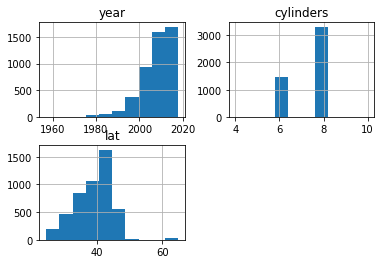

In [139]:
X_train_rfe.hist();

In [140]:
box_cox = PowerTransformer(method = 'box-cox')
X_train_rfe = box_cox.fit_transform(X_train_rfe)
X_test_rfe = box_cox.transform(X_test_rfe)

c:\Users\Администратор.000\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\Администратор.000\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [141]:
model.fit(X_train_rfe, y_train)
y_predicted = model.predict(X_test_rfe)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 4646.659


##  МЕТОДЫ ВЫБОРА ПРИЗНАКОВ НА ОСНОВЕ ФИЛЬТРОВ

In [142]:
from sklearn.feature_selection import SelectKBest, f_regression

In [143]:
selector = SelectKBest(f_regression, k=3)
selector.fit(X_train, y_train)
 
col_to_train = selector.get_feature_names_out()
col_to_train

array(['year', 'cylinders', 'odometer'], dtype=object)

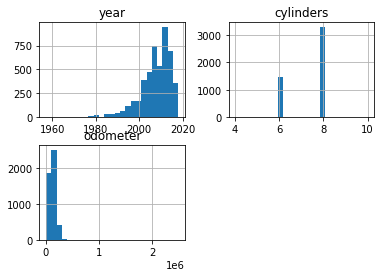

In [144]:
X_train_kb = X_train[col_to_train]
X_test_kb = X_test[col_to_train]
X_train_kb.hist(bins=25);

In [145]:
transform = PowerTransformer(method = 'yeo-johnson')
X_train_kb = transform.fit_transform(X_train_kb)
X_test_kb = transform.transform(X_test_kb)

c:\Users\Администратор.000\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\Администратор.000\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [146]:
model.fit(X_train_kb, y_train)
y_predicted = model.predict(X_test_kb)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 4103.121


### Вывод: Метод выбора признаков на основе фильтров показал лучшую метрику на тестовой выборке как с учетом масштабирования данных, так и без.